# Bubble Data EDA
- 2020-05-10 21:45:38
- A first look at the bubble data (from Zhiheng)
- Structure in data directory:
    - bubnums.csv: timestamp of event, "by-hand" count of number of bubbles
    - trig (dir): images during trigger (TIMESTAMP_trig.bmp)
    - next (dir): images in frame after trigger (TIMESTAMP_next.bmp)
    - diff (dir): images subtracting next - trig (TIMESTAMP_diff.bmp)

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import imageio

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
datadir = "/home/ckampa/Coding/machine_learning/bubbleimages/"

# Load bubnums.csv

In [4]:
df = pd.read_csv(datadir+"bubnums.csv", names=["timestamp", "N_bubs"])

In [5]:
df.head()

timestamp  N_bubs
0  20170623_3_0       0
1  20170623_3_1       0
2  20170623_3_2       0
3  20170623_3_3       0
4  20170623_3_4       0

In [6]:
df.describe()

N_bubs
count  24774.000000
mean       0.307823
std        0.488041
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000

In [7]:
(df.N_bubs > 0).sum()

7333

In [8]:
(df.N_bubs > 0).sum() / len(df)

0.2959958020505368

In [9]:
len(df)

24774

- Should have 24,774 datafiles.

# Count files in image directories

In [10]:
len(os.listdir(datadir))

9

In [11]:
len(os.listdir(datadir+'/trig/'))

24698

In [12]:
len(os.listdir(datadir+'/next/'))

24697

In [13]:
len(os.listdir(datadir+'/diff/'))

24697

In [14]:
len(os.listdir(datadir+'/first/'))

24697

In [15]:
len(os.listdir(datadir+'/difffirst/'))

24697

# Look at Images With Bubbles

In [22]:
t = df.iloc[100].timestamp

In [23]:
t

'20170623_7_80'

In [24]:
image= imageio.imread(datadir+'diff/'+t+'_diff.bmp')

In [25]:
image.shape

(494, 659)

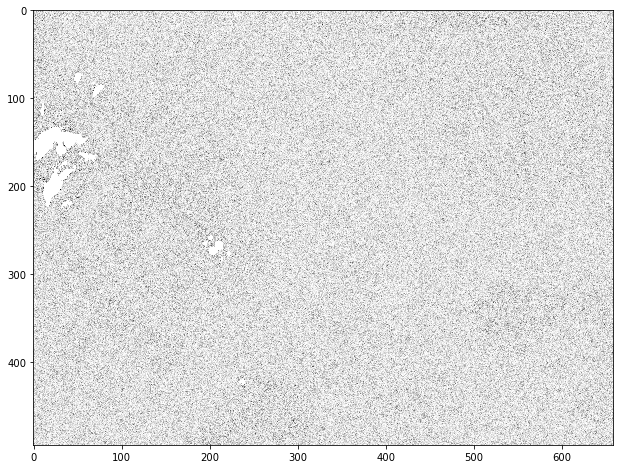

In [26]:
plt.imshow(image, 'gray')

In [27]:
nbs = df.N_bubs == 0
bs = df.N_bubs > 0
b1 = df.N_bubs == 1
b2 = df.N_bubs == 2
b3 = df.N_bubs == 3

In [28]:
len(df[nbs])

17441

In [29]:
len(df[bs])

7333

In [30]:
len(df)

24774

In [31]:
N = 14

In [32]:
df[bs].iloc[N]

timestamp    20170626_7_9
N_bubs                  2
Name: 882, dtype: object

In [33]:
t = df[bs].iloc[1].timestamp

In [34]:
t

'20170626_6_2'

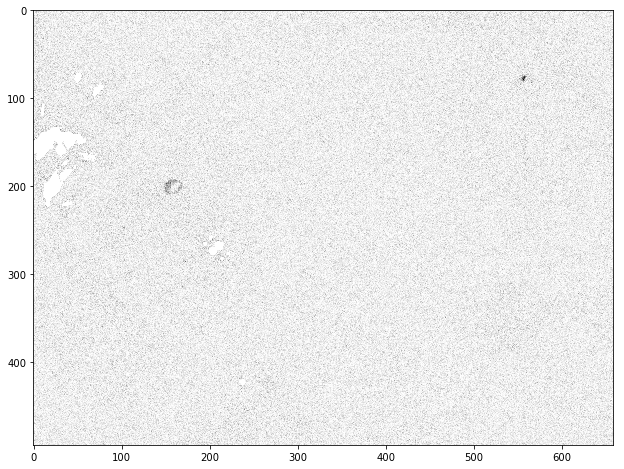

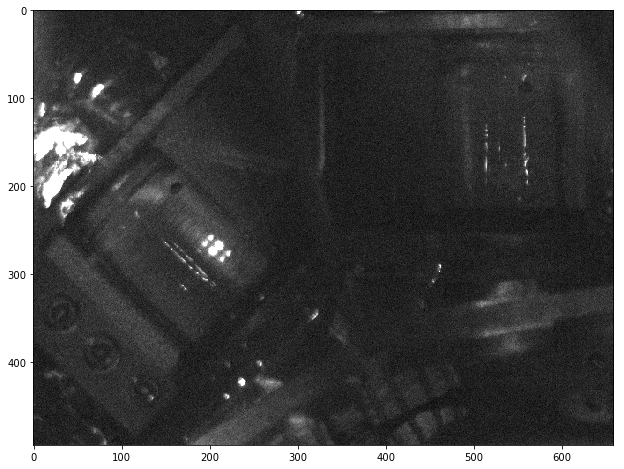

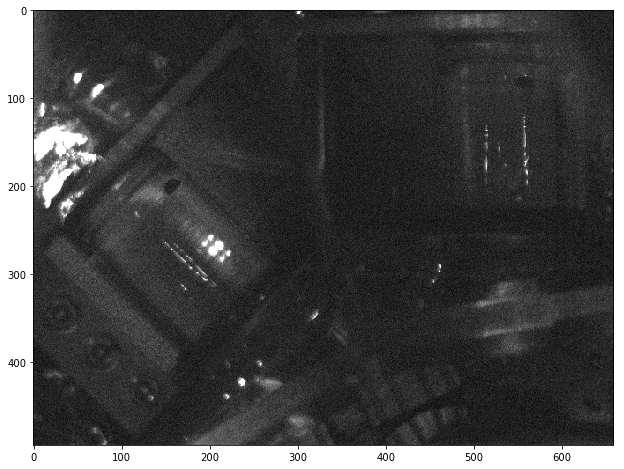

In [35]:
# diff
plt.figure()
image= imageio.imread(datadir+'diff/'+t+'_diff.bmp')
plt.imshow(image, 'gray')
# trig
plt.figure()
image= imageio.imread(datadir+'trig/'+t+'_trig.bmp')
plt.imshow(image, 'gray')
# next
plt.figure()
image= imageio.imread(datadir+'next/'+t+'_next.bmp')
plt.imshow(image, 'gray')

# Average Trigger Frame for 0 Bubble Events

In [36]:
zb = df.N_bubs == 0

In [37]:
len(df[zb])

17441

In [38]:
len(df)

24774

In [39]:
df0 = df[zb]

In [40]:
df0

timestamp  N_bubs
0      20170623_3_0       0
1      20170623_3_1       0
2      20170623_3_2       0
3      20170623_3_3       0
4      20170623_3_4       0
...             ...     ...
24766  20171011_9_2       0
24767  20171011_9_3       0
24768  20171011_9_4       0
24771  20171011_9_7       0
24772  20171011_9_8       0

[17441 rows x 2 columns]

In [41]:
list(df0.timestamp)

['20170623_3_0',
 '20170623_3_1',
 '20170623_3_2',
 '20170623_3_3',
 '20170623_3_4',
 '20170623_4_0',
 '20170623_4_1',
 '20170623_4_2',
 '20170623_4_3',
 '20170623_4_4',
 '20170623_5_0',
 '20170623_5_1',
 '20170623_5_2',
 '20170623_5_3',
 '20170623_6_0',
 '20170623_6_1',
 '20170623_6_2',
 '20170623_6_3',
 '20170623_6_4',
 '20170623_6_5',
 '20170623_7_0',
 '20170623_7_1',
 '20170623_7_2',
 '20170623_7_3',
 '20170623_7_4',
 '20170623_7_5',
 '20170623_7_6',
 '20170623_7_7',
 '20170623_7_8',
 '20170623_7_9',
 '20170623_7_10',
 '20170623_7_11',
 '20170623_7_12',
 '20170623_7_13',
 '20170623_7_14',
 '20170623_7_15',
 '20170623_7_16',
 '20170623_7_17',
 '20170623_7_18',
 '20170623_7_19',
 '20170623_7_20',
 '20170623_7_21',
 '20170623_7_22',
 '20170623_7_23',
 '20170623_7_24',
 '20170623_7_25',
 '20170623_7_26',
 '20170623_7_27',
 '20170623_7_28',
 '20170623_7_29',
 '20170623_7_30',
 '20170623_7_31',
 '20170623_7_32',
 '20170623_7_33',
 '20170623_7_34',
 '20170623_7_35',
 '20170623_7_36',
 '20

In [42]:
diff_files = os.listdir(datadir+'diff/')

In [43]:
diff_files

['20170924_3_55_diff.bmp',
 '20171002_8_9_diff.bmp',
 '20170717_2_18_diff.bmp',
 '20170711_0_36_diff.bmp',
 '20170709_6_30_diff.bmp',
 '20170630_4_25_diff.bmp',
 '20170710_5_70_diff.bmp',
 '20170629_9_3_diff.bmp',
 '20170703_0_85_diff.bmp',
 '20170920_10_4_diff.bmp',
 '20171005_1_37_diff.bmp',
 '20170715_1_10_diff.bmp',
 '20170716_6_85_diff.bmp',
 '20170624_0_21_diff.bmp',
 '20170626_7_14_diff.bmp',
 '20170805_1_93_diff.bmp',
 '20171003_4_74_diff.bmp',
 '20170626_0_30_diff.bmp',
 '20171009_10_40_diff.bmp',
 '20170928_2_63_diff.bmp',
 '20170627_0_18_diff.bmp',
 '20171008_0_74_diff.bmp',
 '20170629_0_0_diff.bmp',
 '20171004_0_78_diff.bmp',
 '20170623_7_85_diff.bmp',
 '20171006_1_48_diff.bmp',
 '20171004_3_13_diff.bmp',
 '20170805_2_11_diff.bmp',
 '20171007_0_13_diff.bmp',
 '20171007_0_71_diff.bmp',
 '20171002_0_93_diff.bmp',
 '20170925_1_48_diff.bmp',
 '20170707_10_45_diff.bmp',
 '20171005_2_17_diff.bmp',
 '20171001_4_97_diff.bmp',
 '20170923_2_3_diff.bmp',
 '20170805_1_11_diff.bmp',
 '2

In [44]:
image= imageio.imread(datadir+'diff/'+diff_files[0])

In [45]:
image.shape

(494, 659)

In [46]:
image

Array([[249, 239, 247, ..., 244, 249, 250],
       [246, 243, 241, ..., 251, 254, 255],
       [243, 252, 251, ..., 254, 248, 253],
       ...,
       [251, 240, 240, ..., 242, 240, 250],
       [243, 240, 252, ..., 242, 253, 255],
       [240, 239, 250, ..., 243, 254, 251]], dtype=uint8)

In [47]:
N = len(diff_files)

In [48]:
N

24697

In [ ]:
## NOT THIS ONE

In [49]:
image_sum = np.zeros((494, 659, N), dtype=np.uint8)

In [50]:
for i, f in enumerate(df0.timestamp):#diff_files:
    f = f + '_diff.bmp'
    #print(f)
    if f in diff_files:
        image = imageio.imread(datadir+'diff/'+f)
        image_sum[:,:,i] = image
        #image_sum += image

In [ ]:
########

In [58]:
## THIS ONE

In [59]:
image_sum = [] # np.zeros((494, 659, N), dtype=np.uint8)

for i, f in enumerate(df0.timestamp):#diff_files:
    f = f + '_diff.bmp'
    #print(f)
    if f in diff_files:
        image = imageio.imread(datadir+'diff/'+f)
        image_sum.append(image)
        #image_sum += image

In [60]:
image_sum = np.array(image_sum)

In [61]:
image_sum.shape

(17364, 494, 659)

In [62]:
#############

In [63]:
image_avg = np.mean(image_sum, axis=0)

In [64]:
image_avg.shape

(494, 659)

In [65]:
# save average_image

In [66]:
pkl.dump(image_avg, open(datadir+'diff_avg_nobubs.pkl', 'wb'))

In [67]:
image_avg

array([[243.62272518, 243.6833103 , 243.58978346, ..., 245.48946095,
        245.50956001, 245.55448053],
       [243.67277125, 243.61800276, 243.73629348, ..., 245.56692006,
        245.6033748 , 245.64005989],
       [243.44419489, 243.57884128, 243.63297627, ..., 245.61034324,
        245.61546879, 245.57590417],
       ...,
       [245.76434001, 245.82947478, 245.74498963, ..., 245.40831606,
        245.33252707, 245.1640751 ],
       [245.8545842 , 245.89507026, 245.98266528, ..., 245.1033748 ,
        245.10107118, 245.30453812],
       [245.83598249, 245.97638793, 245.92438378, ..., 245.1184059 ,
        245.06571067, 245.06542271]])

In [296]:
image_avg = pkl.load(open(datadir+'diff_avg_nobubs.pkl', 'rb'))

In [297]:
image_avg = 255 - image_avg

In [137]:
image_avg

array([[11.37727482, 11.3166897 , 11.41021654, ...,  9.51053905,
         9.49043999,  9.44551947],
       [11.32722875, 11.38199724, 11.26370652, ...,  9.43307994,
         9.3966252 ,  9.35994011],
       [11.55580511, 11.42115872, 11.36702373, ...,  9.38965676,
         9.38453121,  9.42409583],
       ...,
       [ 9.23565999,  9.17052522,  9.25501037, ...,  9.59168394,
         9.66747293,  9.8359249 ],
       [ 9.1454158 ,  9.10492974,  9.01733472, ...,  9.8966252 ,
         9.89892882,  9.69546188],
       [ 9.16401751,  9.02361207,  9.07561622, ...,  9.8815941 ,
         9.93428933,  9.93457729]])

In [151]:
image_sum.shape

(494, 659, 24535)

In [122]:
df0.timestamp

0        20170623_3_0
1        20170623_3_1
2        20170623_3_2
3        20170623_3_3
4        20170623_3_4
             ...     
24766    20171011_9_2
24767    20171011_9_3
24768    20171011_9_4
24771    20171011_9_7
24772    20171011_9_8
Name: timestamp, Length: 17441, dtype: object

In [124]:
for f in df0.timestamp:#diff_files:
    f = f + '_diff.bmp'
    #print(f)
    if f in diff_files:
        image = imageio.imread(datadir+'diff/'+f)
        image_sum += image

In [125]:
image_sum

array([[4207800., 4209030., 4207355., ..., 4240095., 4240460., 4241303.],
       [4208625., 4207810., 4209798., ..., 4241396., 4242056., 4242781.],
       [4204708., 4207115., 4208160., ..., 4242270., 4242252., 4241525.],
       ...,
       [4244837., 4245942., 4244448., ..., 4238717., 4237352., 4234496.],
       [4246304., 4247076., 4248701., ..., 4233511., 4233514., 4236930.],
       [4246255., 4248598., 4247533., ..., 4233623., 4232849., 4232774.]])

In [126]:
image_avg = image_sum / N

In [86]:
dt_4bub = df[df.N_bubs == 4].timestamp.values[0]

In [347]:
#fname = dt_4bub
fname = diff_files[2][:-9]

In [348]:
fname

'20170717_2_18'

In [349]:
image= imageio.imread(datadir+'diff/'+fname+'_diff.bmp')
timage = imageio.imread(datadir+'trig/'+fname+'_trig.bmp')
#image= imageio.imread(datadir+'diff/'+diff_files[2])

In [350]:
np.max(image)

255

In [351]:
image = 255 - image
#timage = 255 - timage

In [352]:
#image_avg = 255 - image_avg

In [353]:
image_min_avg = image - image_avg

In [354]:
np.sum(image_min_avg)

44290.50155494125

In [355]:
np.sum(image_min_avg)

44290.50155494125

In [356]:
np.mean(image_min_avg)

0.13604990248671847

In [357]:
np.mean(image)

9.83671124817998

In [358]:
np.mean(image_avg)

9.70066134569326

In [359]:
np.std(image), np.std(image_avg), np.std(image_min_avg)

(7.557785249898852, 1.0347954765493173, 7.489829703775824)

In [360]:
plotdir = datadir+'plots/'

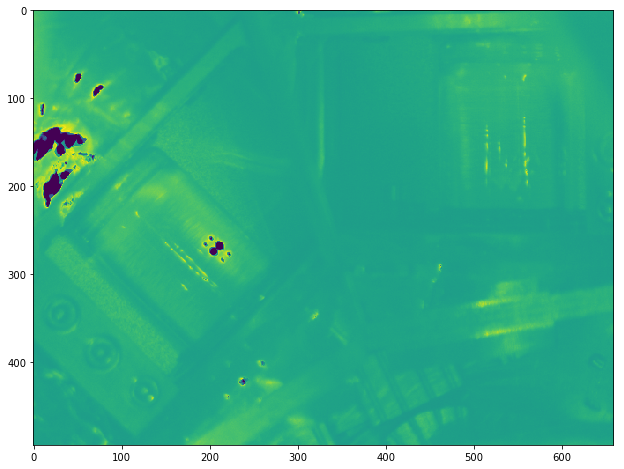

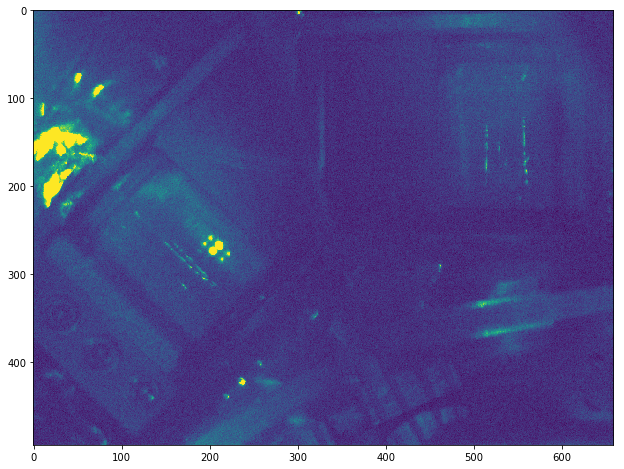

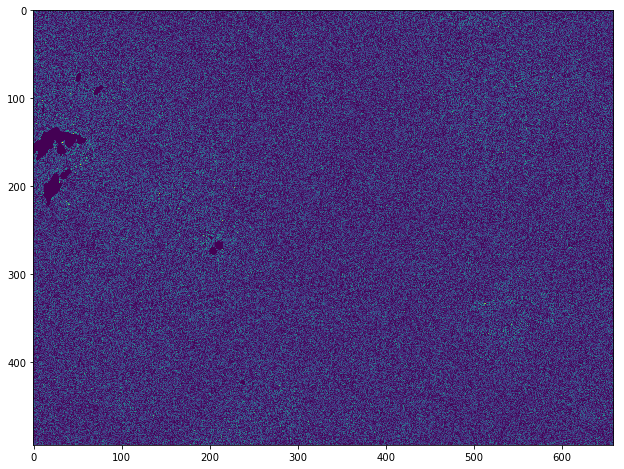

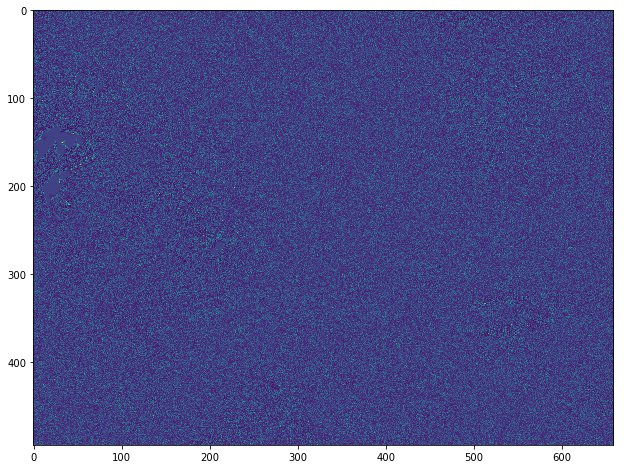

In [361]:
n = '0bub'#'4bub'
# avg
fig = plt.figure()
plt.imshow(image_avg, )#'gray')
fig.savefig(plotdir+'diff_avg_inv.pdf')
fig.savefig(plotdir+'diff_avg_inv.png')
# example
# trig
fig = plt.figure()
plt.imshow(timage, )#'gray')
fig.savefig(plotdir+f'trig_{n}.pdf')
fig.savefig(plotdir+f'trig_{n}.png')
# diff
fig = plt.figure()
plt.imshow(image, )#'gray')
fig.savefig(plotdir+f'diff_{n}_inv.pdf')
fig.savefig(plotdir+f'diff_{n}_inv.png')
# subtract
fig = plt.figure()
plt.imshow(image_min_avg, )#'gray')
fig.savefig(plotdir+f'subavg_diff_{n}_inv.pdf')
fig.savefig(plotdir+f'subavg_diff_{n}_inv.png')

In [ ]:
image= imageio.imread(datadir+'trig/'+trig_files[0])

In [129]:
# simple sum feature

In [138]:
#sum_dict = {0:[], 1:[], 2:[], 3:[], 4:[]}

In [260]:
'''
# invert
def get_sum(filename):
    image= imageio.imread(filename)
    image = 255 - image
    image_min_avg = image - image_avg
    return np.sum(image_min_avg)

# no invert
def get_sum(filename):
    image= imageio.imread(filename)
    #image = 255 - image
    image_min_avg = image - image_avg
    return np.sum(image_min_avg)
'''

# no average subtract
def get_sum(filename):
    image= imageio.imread(filename)
    return np.sum(image)
    #image = 255 - image
    #image_min_avg = image - image_avg
    #return np.sum(image_min_avg)

In [261]:
get_sum(datadir+'diff/'+dt_4bub+'_diff.bmp')

79844812

In [262]:
get_sum(datadir+'diff/'+diff_files[6])

79839483

In [263]:
diff_files[6], df.N_bubs.values[6]

('20170710_5_70_diff.bmp', 0)

In [232]:
image_avg

array([[243.62272518, 243.6833103 , 243.58978346, ..., 245.48946095,
        245.50956001, 245.55448053],
       [243.67277125, 243.61800276, 243.73629348, ..., 245.56692006,
        245.6033748 , 245.64005989],
       [243.44419489, 243.57884128, 243.63297627, ..., 245.61034324,
        245.61546879, 245.57590417],
       ...,
       [245.76434001, 245.82947478, 245.74498963, ..., 245.40831606,
        245.33252707, 245.1640751 ],
       [245.8545842 , 245.89507026, 245.98266528, ..., 245.1033748 ,
        245.10107118, 245.30453812],
       [245.83598249, 245.97638793, 245.92438378, ..., 245.1184059 ,
        245.06571067, 245.06542271]])

In [233]:
len(df)

24774

In [234]:
len(diff_files)

24697

In [235]:
diff_files[0][:-9]

'20170924_3_55'

In [236]:
dfiles_short = [f[:-9] for f in diff_files]

In [237]:
mask = []
for row in df.itertuples():
    if row.timestamp in dfiles_short:
        mask.append(True)
    else:
        mask.append(False)

In [238]:
mask

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,


In [239]:
df_diff = df[mask].copy()

In [240]:
df_diff.reset_index(drop=True, inplace=True)

In [241]:
df_diff

timestamp  N_bubs
0       20170623_7_0       0
1       20170623_7_1       0
2       20170623_7_2       0
3       20170623_7_3       0
4       20170623_7_4       0
...              ...     ...
24692   20171011_9_5       2
24693   20171011_9_6       1
24694   20171011_9_7       0
24695   20171011_9_8       0
24696  20171011_10_0       1

[24697 rows x 2 columns]

In [264]:
sum_dict = {0:[], 1:[], 2:[], 3:[], 4:[]}

In [265]:
for row in df_diff.itertuples():
    n = int(row.N_bubs)
    sum_dict[n].append(get_sum(datadir+'diff/'+row.timestamp+'_diff.bmp'))

In [266]:
sum_dict = {key: np.array(value) for key, value in sum_dict.items()}

In [267]:
sum_dict

{0: array([79894497, 79881555, 79888722, ..., 79845192, 79833035, 79850602],
       dtype=uint64),
 1: array([79871517, 79862158, 79848549, ..., 79846584, 79834150, 79827087],
       dtype=uint64),
 2: array([79864936, 79855577, 79851149, 79868397, 79867272, 79867598,
        79859244, 79850213, 79865430, 79833836, 79851083, 79861418,
        79839166, 79857581, 79859490, 79855666, 79855013, 79861686,
        79859202, 79837344, 79854445, 79858102, 79871278, 79855976,
        79857013, 79846172, 79856359, 79854240, 79845949, 79847454,
        79862555, 79855061, 79852641, 79852744, 79837652, 79850609,
        79839045, 79853653, 79843257, 79840838, 79861063, 79851313,
        79863092, 79843235, 79832782, 79852099, 79850161, 79838306,
        79850341, 79842193, 79856448, 79833491, 79855742, 79845541,
        79849191, 79851688, 79837637, 79847798, 79845237, 79845783,
        79849330, 79826159, 79853581, 79846289, 79846446, 79844516,
        79841746, 79842399, 79847886, 79838434, 798

In [268]:
pkl.dump(sum_dict, open(datadir+'sum_dict.pkl', 'wb'))

In [269]:
sum_dict

{0: array([79894497, 79881555, 79888722, ..., 79845192, 79833035, 79850602],
       dtype=uint64),
 1: array([79871517, 79862158, 79848549, ..., 79846584, 79834150, 79827087],
       dtype=uint64),
 2: array([79864936, 79855577, 79851149, 79868397, 79867272, 79867598,
        79859244, 79850213, 79865430, 79833836, 79851083, 79861418,
        79839166, 79857581, 79859490, 79855666, 79855013, 79861686,
        79859202, 79837344, 79854445, 79858102, 79871278, 79855976,
        79857013, 79846172, 79856359, 79854240, 79845949, 79847454,
        79862555, 79855061, 79852641, 79852744, 79837652, 79850609,
        79839045, 79853653, 79843257, 79840838, 79861063, 79851313,
        79863092, 79843235, 79832782, 79852099, 79850161, 79838306,
        79850341, 79842193, 79856448, 79833491, 79855742, 79845541,
        79849191, 79851688, 79837637, 79847798, 79845237, 79845783,
        79849330, 79826159, 79853581, 79846289, 79846446, 79844516,
        79841746, 79842399, 79847886, 79838434, 798

In [270]:
sum_dict = pkl.load(open(datadir+'sum_dict.pkl', 'rb'))

In [271]:
sum_dict

{0: array([79894497, 79881555, 79888722, ..., 79845192, 79833035, 79850602],
       dtype=uint64),
 1: array([79871517, 79862158, 79848549, ..., 79846584, 79834150, 79827087],
       dtype=uint64),
 2: array([79864936, 79855577, 79851149, 79868397, 79867272, 79867598,
        79859244, 79850213, 79865430, 79833836, 79851083, 79861418,
        79839166, 79857581, 79859490, 79855666, 79855013, 79861686,
        79859202, 79837344, 79854445, 79858102, 79871278, 79855976,
        79857013, 79846172, 79856359, 79854240, 79845949, 79847454,
        79862555, 79855061, 79852641, 79852744, 79837652, 79850609,
        79839045, 79853653, 79843257, 79840838, 79861063, 79851313,
        79863092, 79843235, 79832782, 79852099, 79850161, 79838306,
        79850341, 79842193, 79856448, 79833491, 79855742, 79845541,
        79849191, 79851688, 79837637, 79847798, 79845237, 79845783,
        79849330, 79826159, 79853581, 79846289, 79846446, 79844516,
        79841746, 79842399, 79847886, 79838434, 798

In [272]:
sum_vals = [list(value) for key, value in sum_dict.items()]

In [273]:
sv = []
for s in sum_vals:
    sv += s
sv = np.array(sv)

In [274]:
sv

array([79894497, 79881555, 79888722, ..., 79831132, 79848340, 79844812],
      dtype=uint64)

In [275]:
np.mean(sv), np.min(sv), np.max(sv)

(79854997.41389643, 79797967, 79902478)

In [276]:
xmin, xmax = np.min(sv), np.max(sv)

In [277]:
nbins = 200

In [278]:
bins = np.linspace(xmin, xmax+0.01, nbins)

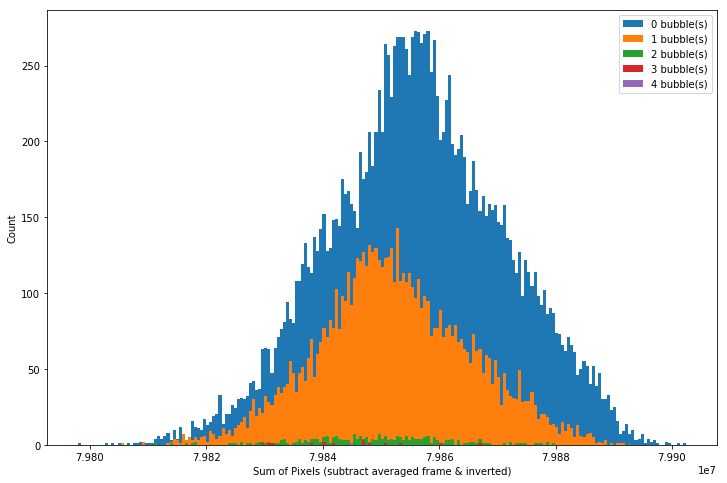

In [279]:
fig = plt.figure()
for key, value in sum_dict.items():
    #plt.hist(value, bins=bins, weights=1/len(value)*np.ones_like(value), label=f'{key} bubble(s)')
    plt.hist(value, bins=bins, label=f'{key} bubble(s)')

plt.xlabel('Sum of Pixels (subtract averaged frame & inverted)')
plt.ylabel('Count')
plt.legend();

In [217]:
sum_dict[0] / np.sum(sum_dict[0])

array([ 5.48016330e+11,  3.62731441e+11,  4.65338209e+11, ...,
       -1.57861545e+11, -3.31907937e+11, -8.04089683e+10])

In [220]:
len(sum_dict[0])

17364

In [219]:
sum_dict[0]

array([-38278.49844506, -25336.49844506, -32503.49844506, ...,
        11026.50155494,  23183.50155494,   5616.50155494])

In [222]:
sum_dict[0] / len(sum_dict[0])

array([-2.20447469, -1.45913951, -1.87189003, ...,  0.63502082,
        1.33514752,  0.32345667])

# Look at Events.p

In [18]:
Events = pkl.load(open('Events.p', 'rb'), )

AttributeError: Can't get attribute 'BubbleEvent' on <module '__main__'>

In [19]:
pkl.DEFAULT_PROTOCOL, pkl.HIGHEST_PROTOCOL

(3, 4)

In [22]:
pkl.DEFAULT_PROTOCOL = 2

In [23]:
pkl.load(open('Events.p', 'rb'))

AttributeError: Can't get attribute 'BubbleEvent' on <module '__main__'>